# Autoregressive process
Process where current data is correlated with previous one, plus noisy contribution

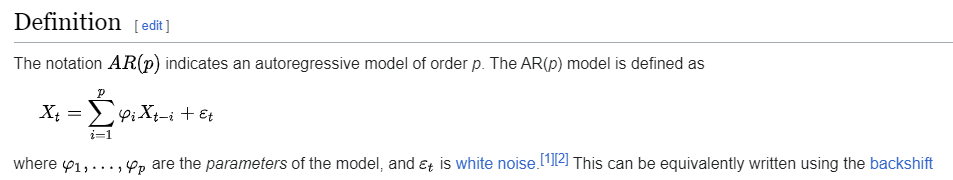

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

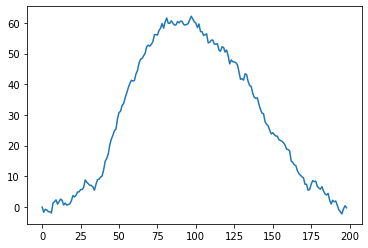

In [37]:
N = 200
k = 2
# alpha = np.linspace(-5,5, k)
alpha = 1
err = np.random.randn(N) + np.sin(np.linspace(0,2*np.pi*N,N))
x = np.empty(N)
for i in range(1,N):
    x[i] = alpha*x[i-1] + err[i]
    
plt.plot(x[1:])

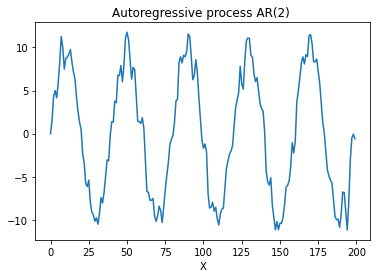

In [65]:
N = 200
k = 2
alpha = np.linspace(-0.4,0.5, k)
err = np.random.randn() + np.sin(np.linspace(0,2*np.pi*N,N))
x = np.zeros(N)
for t in range(k,N):
    x[t] = sum(alpha[:]*x[t-k:t]) + np.random.randn()

x += 10*np.sin(np.linspace(0,10*np.pi,N))
plt.title(f'Autoregressive process AR({k}) ')
plt.xlabel('X')
plt.plot(x)

# Fourier transform

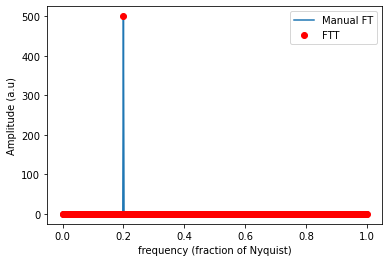

In [174]:
import numpy as np
import matplotlib.pyplot as plt

def complex_sine(freq, t_vect):
    s = np.exp(-1j*2*np.pi*freq*t_vect)
    return s

def signal(t_vect):
    f = 100
    x = np.sin(2*np.pi*f*t_vect)
    return x

N = 1000
freqs = np.arange(N)
t = np.arange(N)/N
s = signal(t_vect=t)

# Manual Fourier Transform
fourier_coeffs = np.zeros(N, dtype='complex')
for f in freqs:
    csw = complex_sine(freq=f, t_vect=t)
    fourier_coeffs[f] = np.dot(csw, s)

# FFT
fourier_coeffs_fft = np.fft.fft(s)
 
f = np.linspace(0,1,int(N/2+1)) 
plt.plot(f,np.abs(fourier_coeffs[:len(f)]), label='Manual FT')
plt.plot(f,np.abs(fourier_coeffs_fft[:len(f)]),'ro', label='FTT')
plt.xlabel('frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u)')
plt.legend()
plt.show()


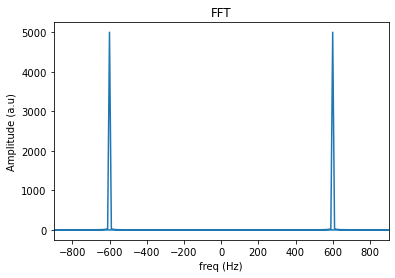

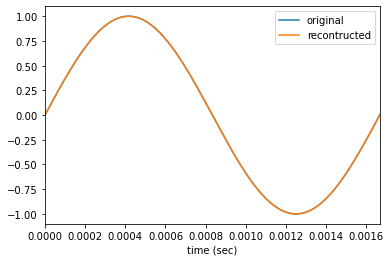

In [191]:
# Using only FFT
N = 10000
timestep = 0.1
fsig = 600 
t = np.linspace(0,N*timestep,N)/N # normalize time vector!!
s = np.sin(2*np.pi*fsig*t)
f = np.fft.fftfreq(N, d=timestep) # frequency vector
fc = np.fft.fft(s)
plt.plot(N*f,np.abs(fc))
plt.xlim(-1.5*fsig,1.5*fsig)
plt.title('FFT')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude (a.u)')
plt.show()
# todo : plot onlt positive freqs

# zero-padding smoothes the recontructed signal
n_padding = 0
t_padded = np.linspace(0,N*timestep,N+n_padding)/N
fc = np.fft.fft(s, n=len(t)+n_padding)
s_rec = np.fft.ifft(fc)
plt.plot(t,s,label='original')
plt.plot(t_padded,s_rec.real,label='recontructed')
plt.xlim(0,1/fsig)
plt.xlabel('time (sec)')
plt.legend()
plt.show()


# Welch's method
Performs a piece-wise fft/ifft (overalpping) on the overall signal and then takes the averages of all the recontructed signals 

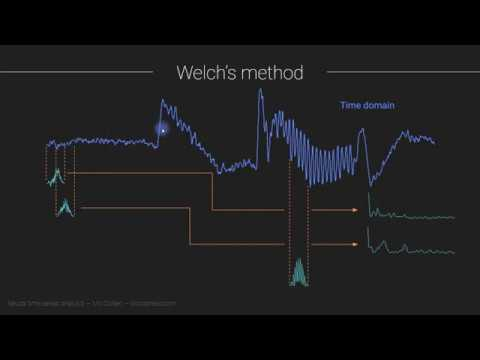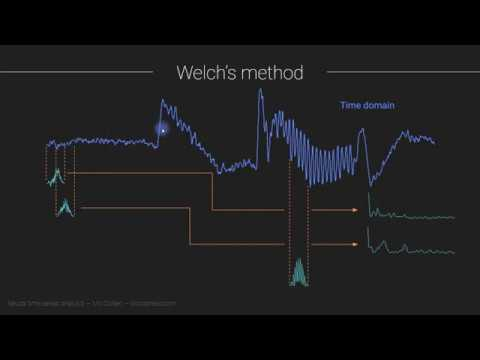



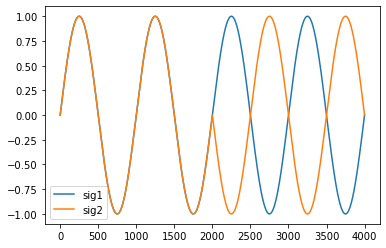

(0.0, 0.01)

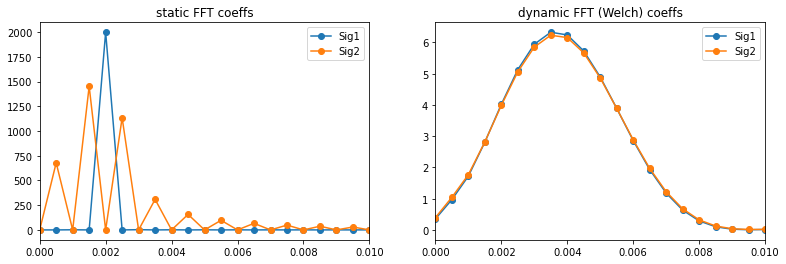

In [235]:
from scipy.signal import welch

N = 2000
t = np.linspace(0, 4*np.pi, N)
signal1 = np.concatenate((np.sin(t), np.sin(t)))
signal2 = np.concatenate((np.sin(t), -np.sin(t)))
plt.plot(signal1, label='sig1')
plt.plot(signal2, label='sig2')
plt.legend()
plt.show()

# static FFT
staticFc1 = np.fft.fft(signal1)
staticFc2 = np.fft.fft(signal2)
staticFreqs = np.linspace(0,1,int(len(signal1)/2+1)) # in fraction of Nyquist freq

fig,ax = plt.subplots(1,2, figsize=(13,4))
ax[0].plot(staticFreqs, np.abs(staticFc1[:len(staticFreqs)]), '-o', label='Sig1')
ax[0].plot(staticFreqs, np.abs(staticFc2[:len(staticFreqs)]), '-o', label='Sig2')
ax[0].set_title('static FFT coeffs')
ax[0].legend()
ax[0].set_xlim([0,.01])

dynamicFreqs1,dynamicFc1 = welch(signal1, nfft=N)
dynamicFreqs2,dynamicFc2 = welch(signal2, nfft=N)
ax[1].plot(dynamicFreqs1, dynamicFc1, '-o', label='Sig1')
ax[1].plot(dynamicFreqs2, dynamicFc2, '-o', label='Sig2')
ax[1].set_title('dynamic FFT (Welch) coeffs')
ax[1].legend()
ax[1].set_xlim([0,.01])


Comments : static FFT has zero coeff for sig2 because of the -180 phase shift, this doesn not happen with welch method

# Spectrogram

In [236]:
from scipy.signal import spectrogram


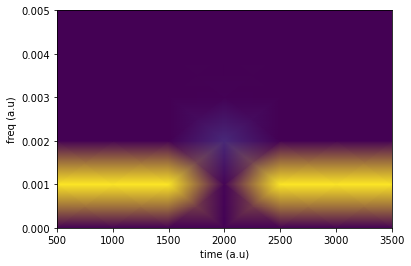

In [243]:
f,t,Sxx = spectrogram(signal2, noverlap=500, nperseg=1000)

plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylabel('freq (a.u)')
plt.xlabel('time (a.u)')
plt.ylim([0,.005])
plt.show()

Need to work on spectrogram alogrithm parameters (eg. noverlap) to see the 180 phase shift of the signal!